In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import tensorflow as tf
import vgg16
import utils

In [5]:
!pip install scikit-image

In [6]:
from skimage import io
import matplotlib.pyplot as plt

#### Image Load 및 data 준비하기

In [7]:
fn1 ="./test_data/mybread.jpg"
#fn1 ="./test_data/puzzle.jpeg"
#fn1 ="./test_data/6201041_sd.jpg"
fn2 ="./test_data/mynotebook_1.jpg"
#fn2 = "./test_data/IMG_0358s.jpg"

In [8]:
i1 = io.imread(fn1)
i2 = io.imread(fn2)

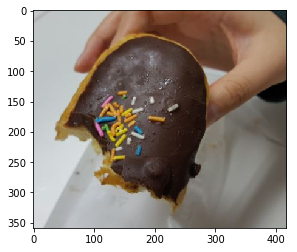

In [9]:
plt.imshow(i1)

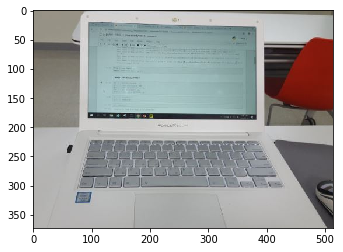

In [10]:
plt.imshow(i2)

f, axarr = plt.subplots(1,2, sharey=True, figsize=(11,5))
axarr[0].imshow(i1)
axarr[1].imshow(i2)

In [11]:
img1 = utils.load_image(fn1)
img2 = utils.load_image(fn2)

# Just in case of using four-channel images
img1 = img1[:, :, :3]
img2 = img2[:, :, :3]

print(img1.shape)
print(img2.shape)

(224, 224, 3)
(224, 224, 3)


In [12]:
img1r = img1.reshape((1, 224, 224, 3)) #1이 들어간 이유는 batch 처리를 하기 위해. 반복적인일을 순서를 알려주면 batch로 처리함
img2r = img2.reshape((1, 224, 224, 3))

print(img1r.shape)
print(img2r.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [13]:
batch = np.concatenate((img1r, img2r), 0)
print(batch.shape)

(2, 224, 224, 3)


#### VGG model 

In [14]:
# !wget https://www.dropbox.com/s/8a8rei66f72um4i/vgg16.npy
vgg = vgg16.Vgg16('vgg16.npy')
#print(vgg.data_dict)

npy file loaded


#### Tensorflow

In [15]:
images = tf.placeholder("float", [2, 224, 224, 3]) #텐서플로야 2장을 줄게

In [16]:
vgg.build(images)

build model started
build model finished: 7s


* Students : vgg16.py 를 열어서 build 함수 이해하기

In [17]:
# initialize
sess = tf.InteractiveSession()

In [18]:
feed_dict = {images: batch}
prob = sess.run(vgg.prob, feed_dict=feed_dict)

#### 예측 결과 출력하기

In [19]:
print(prob[0])

[3.80265410e-05 4.39301584e-05 5.60428743e-05 1.04920427e-05
 4.90220773e-05 2.42814160e-04 2.94194731e-04 3.10277005e-06
 6.36590630e-06 2.69766467e-08 3.93278133e-05 3.70108646e-05
 8.53856454e-06 1.14308714e-04 5.29603276e-05 3.32424975e-06
 2.95301379e-06 1.64901248e-05 6.64696881e-06 4.55077043e-06
 5.39850771e-06 4.65636640e-06 3.18742309e-06 2.40802683e-06
 1.14855391e-06 1.22657671e-04 1.53511413e-04 2.92543351e-04
 9.21341823e-04 2.29418747e-05 1.08005734e-05 1.15504576e-04
 1.12932910e-04 8.23982282e-06 7.87706995e-06 2.34350919e-05
 2.38764878e-05 7.45211873e-05 2.96960716e-05 7.45780255e-08
 6.92594040e-06 3.93843322e-07 1.74146919e-06 3.12897413e-07
 1.05310824e-06 9.38113658e-07 6.35267907e-06 3.55816451e-06
 1.58576334e-08 2.84879519e-07 4.91621961e-07 1.46141713e-06
 5.89475940e-06 1.22565529e-04 1.39607482e-06 3.87333603e-06
 7.38353810e-06 4.06481104e-06 1.49056655e-06 3.11717554e-06
 3.09347797e-06 8.07462300e-07 8.29593546e-07 1.31166223e-06
 8.00193902e-06 1.836301

In [20]:
print(prob[0].shape)

(1000,)


In [21]:
print(np.argmax(prob[0]))

941


In [22]:
# returns the top1 string #몰라도 됨
def print_prob(prob, file_path):
    synset = [l.strip() for l in open(file_path).readlines()]

    # print prob
    pred = np.argsort(prob)[::-1]

    # Get top1 label
    top1 = synset[pred[0]]
    print(("Top1: ", top1, prob[pred[0]]))
    # Get top5 label
    top5 = [(synset[pred[i]], prob[pred[i]]) for i in range(5)]
    print(("Top5: ", top5))
    return top1

In [23]:
#!cat synset.txt # Linux or Mac users
!type synset.txt # Windows users

n01440764 tench, Tinca tinca
n01443537 goldfish, Carassius auratus
n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
n01491361 tiger shark, Galeocerdo cuvieri
n01494475 hammerhead, hammerhead shark
n01496331 electric ray, crampfish, numbfish, torpedo
n01498041 stingray
n01514668 cock
n01514859 hen
n01518878 ostrich, Struthio camelus
n01530575 brambling, Fringilla montifringilla
n01531178 goldfinch, Carduelis carduelis
n01532829 house finch, linnet, Carpodacus mexicanus
n01534433 junco, snowbird
n01537544 indigo bunting, indigo finch, indigo bird, Passerina cyanea
n01558993 robin, American robin, Turdus migratorius
n01560419 bulbul
n01580077 jay
n01582220 magpie
n01592084 chickadee
n01601694 water ouzel, dipper
n01608432 kite
n01614925 bald eagle, American eagle, Haliaeetus leucocephalus
n01616318 vulture
n01622779 great grey owl, great gray owl, Strix nebulosa
n01629819 European fire salamander, Salamandra salamandra
n01630670 common newt, Tr


synset.txt


지정된 파일을 찾을 수 없습니다.
다음 내용 진행 중 오류 발생: #.
지정된 파일을 찾을 수 없습니다.
다음 내용 진행 중 오류 발생: Windows.
지정된 파일을 찾을 수 없습니다.
다음 내용 진행 중 오류 발생: users.


In [24]:
top1 = print_prob(prob[0], 'synset.txt')

('Top1: ', 'n07717410 acorn squash', 0.42078465)
('Top5: ', [('n07717410 acorn squash', 0.42078465), ('n07697537 hotdog, hot dog, red hot', 0.11557627), ('n07615774 ice lolly, lolly, lollipop, popsicle', 0.057674527), ('n02807133 bathing cap, swimming cap', 0.03876958), ('n02877765 bottlecap', 0.03505882)])


In [25]:
print("Top1: {}".format(top1))

Top1: n07717410 acorn squash


In [26]:
print_prob(prob[1], 'synset.txt')

('Top1: ', 'n03832673 notebook, notebook computer', 0.40817958)
('Top5: ', [('n03832673 notebook, notebook computer', 0.40817958), ('n03642806 laptop, laptop computer', 0.33867267), ('n03085013 computer keyboard, keypad', 0.03796202), ('n04264628 space bar', 0.035308916), ('n03793489 mouse, computer mouse', 0.03154268)])


'n03832673 notebook, notebook computer'